In [109]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization 
import statsmodels.api as sm # to build a LOWESS model
from scipy.interpolate import interp1d # for interpolation of new data pointsexog

# Select Data from US18

Import Data

In [110]:
data = pd.read_csv('us_18Q1.csv')

Select Set of Variables: Non-medical use of various drug types over lifetime and State

In [111]:
df = data[["OP_NMU_EVER", "BENZ_NMU_EVER", "STIM_NMU_EVER", "GABA_NMU_EVER", "ILL_USE", "DEM_STATE"]].copy()

Clean Data by Removing Observations with N/A

In [112]:
df.dropna(thresh=1)

,OP_NMU_EVER,BENZ_NMU_EVER,STIM_NMU_EVER,GABA_NMU_EVER,ILL_USE,DEM_STATE
0,0,0,0,0,0,CT
1,0,0,0,0,0,CA
2,0,0,0,0,1,OR
3,0,0,0,0,1,LA
4,0,0,0,0,0,WI
...,...,...,...,...,...,...
30002,0,0,0,0,0,UT
30003,0,0,0,0,0,MI
30004,1,0,0,0,1,CA
30005,0,0,0,0,0,WI


Aggregate and Normalize Data by State

In [113]:
drugData = df.groupby("DEM_STATE").mean().reset_index()
drugData

,DEM_STATE,OP_NMU_EVER,BENZ_NMU_EVER,STIM_NMU_EVER,GABA_NMU_EVER,ILL_USE
0,AK,0.195122,0.121951,0.048780,0.048780,0.585366
1,AL,0.121951,0.039911,0.035477,0.046563,0.348115
2,AR,0.104575,0.052288,0.045752,0.029412,0.388889
3,AZ,0.132841,0.046740,0.033210,0.041820,0.447724
4,CA,0.163613,0.047573,0.032787,0.048537,0.454516
5,CO,0.161085,0.039872,0.041467,0.039872,0.497608
6,CT,0.125373,0.059701,0.026866,0.032836,0.420896
7,DC,0.279412,0.088235,0.044118,0.117647,0.500000
8,DE,0.120968,0.040323,0.040323,0.024194,0.467742
9,FL,0.141578,0.051173,0.026866,0.050320,0.404691


# External Data

Import External Data: Police By State

In [114]:
policeData = pd.read_csv("police2.csv", header = 4)

In [115]:
# Rename columns
# Add column names
policeData.columns = ["State", "Total Law Enforcement Employees", "Total Officers Male", "Total Officers Female", "Total Civilians Male", "Total Civilians Female", "Number of agencies", "2018 Estimated Population"]
policeData

,State,Total Law Enforcement Employees,Total Officers Male,Total Officers Female,Total Civilians Male,Total Civilians Female,Number of agencies,2018 Estimated Population
0,ALABAMA,15855,9763,898,2000,3194,376,4764354
1,ALASKA,1985,1162,124,263,436,38,737438
2,ARIZONA,22428,11357,1399,4417,5255,114,7170315
3,ARKANSAS,10628,6123,620,1533,2352,303,3009746
4,CALIFORNIA,120041,68663,10478,15339,25561,465,33867039
5,COLORADO,18510,10791,1721,2181,3817,239,5690128
6,CONNECTICUT,9283,6970,822,596,895,106,3572665
7,DELAWARE,3305,2043,272,377,613,55,964931
8,DISTRICT OF COLUMBIA\n,5145,3417,976,320,432,3,702455
9,FLORIDA,68605,36327,6553,9951,15774,333,19436120


In [116]:
# Grab state abbreviation column 
stateAbr= drugData["DEM_STATE"].copy().to_frame()
stateAbr

,DEM_STATE
0,AK
1,AL
2,AR
3,AZ
4,CA
5,CO
6,CT
7,DC
8,DE
9,FL


In [117]:
# Select find per capita poly employees total
totalEmployees = policeData["Total Law Enforcement Employees"].astype('int')
population = policeData["2018 Estimated Population"].astype('int')

percapitaEmployees= totalEmployees/population
percapitaEmployees_df = percapitaEmployees.to_frame()
percapitaEmployees_df.columns = ["Per Capita Employees"]

In [118]:
# Merge and drop
df_pcEmply_state = pd.concat([stateAbr, percapitaEmployees_df], axis=1)
df_pcEmply_state

,DEM_STATE,Per Capita Employees
0,AK,0.003328
1,AL,0.002692
2,AR,0.003128
3,AZ,0.003531
4,CA,0.003544
5,CO,0.003253
6,CT,0.002598
7,DC,0.003425
8,DE,0.007324
9,FL,0.003530


In [119]:
# grab total population column
totalPopulation= policeData[["2018 Estimated Population"]].copy()
totalPopulation

,2018 Estimated Population
0,4764354
1,737438
2,7170315
3,3009746
4,33867039
5,5690128
6,3572665
7,964931
8,702455
9,19436120


Import External Data: State Populations in 2018

In [120]:
policeDF = data[["OP_NMU_EVER", "BENZ_NMU_EVER", "STIM_NMU_EVER", "GABA_NMU_EVER", "ILL_USE", "DEM_STATE"]].copy()

Import External Data: Arrests By State

1.   N/A in IOWA replaced with 0


In [121]:
arrestData = pd.read_csv("arrests.csv", header = 3)
arrestData

,State,Unnamed: 1,Total\nall \nclasses1,Violent\ncrime2,Property\ncrime2,Murder and\nnonnegligent\nmanslaughter,Rape3,Robbery,Aggravated\nassault,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson,Other\nassaults,Forgery and\ncounterfeiting,Fraud,Embezzlement,"Stolen\nproperty;\nbuying,\nreceiving,\npossessing",Vandalism,"Weapons;\ncarrying,\npossessing,\netc.",Prostitution and\ncommercialized\nvice,Sex offenses\n(except\nrape and\nprostitution),Drug \nabuse\nviolations,Gambling,Offenses\nagainst\nthe family\nand\nchildren,Driving\nunder the\ninfluence,Liquor\nlaws,Drunkenness4,Disorderly\nconduct,Vagrancy,All other\noffenses\n(except\ntraffic),Suspicion,Curfew\nand\nloitering\nlaw\nviolations,Number\nof\nagencies,2018\nestimated \npopulation
0,ALABAMA,Total all ages,"126,404","4,761","15,609",214,245,919,"3,383","2,352","12,332",840,85,"13,027",768,"2,103",112,"1,756","1,004","1,585",0,446,"8,217",0.0,420,"6,391","1,434","5,300","1,815",34,"61,622",0.0,0,NaN,NaN
1,ALASKA,Total all ages,"30,620","2,686","3,763",38,149,367,"2,132",602,"2,392",726,43,"4,943",154,201,54,120,"1,103",387,2,263,"1,046",0.0,174,"3,148",592,47,843,17,"11,072",0.0,5,NaN,NaN
2,ARIZONA,Total all ages,"256,785","11,628","32,622",281,328,"1,940","9,079","3,883","26,621","1,711",407,"25,198","1,121","2,055",854,"1,087","10,177","3,093",349,"1,386","32,272",2.0,"2,448","19,200","7,082","11,514","14,723",567,"78,700",54.0,653,NaN,NaN
3,ARKANSAS,Total all ages,"120,240","4,650","12,516",141,238,474,"3,797","1,748","10,118",594,56,"11,688",820,852,49,"1,736","1,544","1,112",136,83,"17,954",6.0,434,"5,761","1,265","5,035","2,301",303,"51,736",0.0,259,NaN,NaN
4,CALIFORNIA,Total all ages,"1,093,080","110,236","97,247","1,409","2,539","16,670","89,618","35,230","42,468","18,020","1,529","81,812","4,118","6,105",921,"16,227","16,652","28,290","6,418","8,901","219,251",403.0,268,"127,250","5,948","58,286","3,451","7,290","293,353",1.0,652,NaN,NaN
5,COLORADO,Total all ages,"193,216","7,832","24,136",195,549,"1,166","5,922","2,301","19,199","2,437",199,"16,477",688,"2,243",112,526,"4,843","2,313",376,521,"16,172",7.0,"2,466","20,353","7,007",144,"6,887",549,"78,790",1.0,773,NaN,NaN
6,CONNECTICUT,Total all ages,"95,709","3,399","12,312",79,212,870,"2,238","1,624","9,834",778,76,"17,370",582,921,140,692,"1,640","1,088",184,360,"8,087",10.0,"1,363","7,484",96,11,"10,505",41,"29,423",0.0,1,NaN,NaN
7,DELAWARE,Total all ages,"28,742","1,965","5,337",33,77,391,"1,464",688,"4,511",116,22,"6,121",210,"1,348",163,324,755,322,121,107,"3,707",9.0,185,427,669,323,"1,164",164,"5,289",0.0,32,NaN,NaN
8,DISTRICT OF COLUMBIA,Total all ages,"13,682",185,86,0,2,113,70,0,76,9,1,411,3,3,0,14,35,42,0,20,290,0.0,2,9,817,49,300,13,"11,403",0.0,0,NaN,NaN
9,FLORIDA,Total all ages,"715,424","34,907","89,456",712,"1,936","5,761","26,498","14,757","66,157","8,295",247,"80,570","1,989","11,207","1,086","1,632","6,129","6,604","1,920","2,862","134,142",123.0,0,"32,127","10,590",0,0,0,"300,080",0.0,0,NaN,NaN


Find Per Capita drug arrest by State

In [122]:
arrest = arrestData[["State", "Drug \nabuse\nviolations"]]
arrest.columns = ["State", "Drug Abuse"]
#drugAb = arrest[["Drug Abuse"]].copy
arrest = arrest[0:51]
#drugAb = arrest[["Drug Abuse"]].copy
df1 = pd.DataFrame(arrest[["Drug Abuse"]])
df2 = pd.DataFrame(totalPopulation)
df1 = df1.replace(',','', regex=True)
df2 = df2.replace(',','', regex=True)
df1 = df1.fillna(0)
df1['Drug Abuse'] = df1['Drug Abuse'].astype(int)
df2['2018 Estimated Population'] = df2['2018 Estimated Population'].astype(int)


drugPerCapita = np.divide(df1,df2)
drugPerCapita



,Drug Abuse
0,0.001725
1,0.001418
2,0.004501
3,0.005965
4,0.006474
5,0.002842
6,0.002264
7,0.003842
8,0.000413
9,0.006902


Final Data

In [123]:
# concat --> US18 Drug data(drugData), states(drugData), policepercapita data, and arrestspercapita data

final_data = pd.concat([drugData, percapitaEmployees_df , drugPerCapita], axis=1)
#renaming the columns
final_data.columns=["DEM_STATE","OP_NMU_EVER",	"BENZ_NMU_EVER",	"STIM_NMU_EVER",	"GABA_NMU_EVER",	"ILL_USE",	"police_per_capita",	"drug_abuse_arrests_PerCapita"]
final_data

,DEM_STATE,OP_NMU_EVER,BENZ_NMU_EVER,STIM_NMU_EVER,GABA_NMU_EVER,ILL_USE,police_per_capita,drug_abuse_arrests_PerCapita
0,AK,0.195122,0.121951,0.048780,0.048780,0.585366,0.003328,0.001725
1,AL,0.121951,0.039911,0.035477,0.046563,0.348115,0.002692,0.001418
2,AR,0.104575,0.052288,0.045752,0.029412,0.388889,0.003128,0.004501
3,AZ,0.132841,0.046740,0.033210,0.041820,0.447724,0.003531,0.005965
4,CA,0.163613,0.047573,0.032787,0.048537,0.454516,0.003544,0.006474
5,CO,0.161085,0.039872,0.041467,0.039872,0.497608,0.003253,0.002842
6,CT,0.125373,0.059701,0.026866,0.032836,0.420896,0.002598,0.002264
7,DC,0.279412,0.088235,0.044118,0.117647,0.500000,0.003425,0.003842
8,DE,0.120968,0.040323,0.040323,0.024194,0.467742,0.007324,0.000413
9,FL,0.141578,0.051173,0.026866,0.050320,0.404691,0.003530,0.006902


**Simple Linear Regression**: X = police_per_capita, Y = different drug uses

In [124]:
lowess = sm.nonparametric.lowess

In [125]:
import statsmodels.api as sm #for regression
import matplotlib.pyplot as plt

X1 = final_data["police_per_capita"].copy()
X1 = sm.add_constant(X1, prepend=False)

In [126]:
# Y = OP_NMU_EVER	
reg1 = sm.OLS(final_data["OP_NMU_EVER"],X1).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:            OP_NMU_EVER   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1199
Date:                Thu, 20 Jan 2022   Prob (F-statistic):              0.731
Time:                        09:08:57   Log-Likelihood:                 100.43
No. Observations:                  51   AIC:                            -196.9
Df Residuals:                      49   BIC:                            -193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
police_per_capita    -2.0210      5.83

Regression line: using police_per_capita to predict OP_NMU_EVER


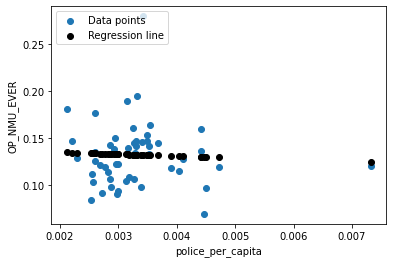

In [127]:
# regression plot for reg 1
reg1_predict = reg1.predict(X1)
print("Regression line: using police_per_capita to predict OP_NMU_EVER")
plt.scatter(final_data["police_per_capita"],final_data["OP_NMU_EVER"],label="Data points")
plt.scatter(final_data["police_per_capita"],reg1_predict,color="k",label="Regression line")
plt.ylabel("OP_NMU_EVER")
plt.xlabel("police_per_capita")
plt.legend(loc = "upper left")
plt.show()

In [128]:
from statsmodels.stats.outliers_influence import OLSInfluence

# outliers detection for reg1
studentized_res1 = OLSInfluence(reg1).get_resid_studentized_external() #gets calculate studentized residuals
outliers1 = []
for index,value in studentized_res1.items():
    if value > 3 or value < -3: #checks within 3 st dev
        outliers1.append(index)
outliers1df = final_data[final_data.index.isin(outliers1)] #gets the actual data points who are outliers in reg1 
outliers1df

,DEM_STATE,OP_NMU_EVER,BENZ_NMU_EVER,STIM_NMU_EVER,GABA_NMU_EVER,ILL_USE,police_per_capita,drug_abuse_arrests_PerCapita
7,DC,0.279412,0.088235,0.044118,0.117647,0.5,0.003425,0.003842


In [129]:
# Y = BENZ_NMU_EVER	
reg2 = sm.OLS(final_data["BENZ_NMU_EVER"],X1).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:          BENZ_NMU_EVER   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1105
Date:                Thu, 20 Jan 2022   Prob (F-statistic):              0.741
Time:                        09:08:58   Log-Likelihood:                 133.87
No. Observations:                  51   AIC:                            -263.7
Df Residuals:                      49   BIC:                            -259.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
police_per_capita     1.0074      3.03

Regression line: using police_per_capita to predict BENZ_NMU_EVER


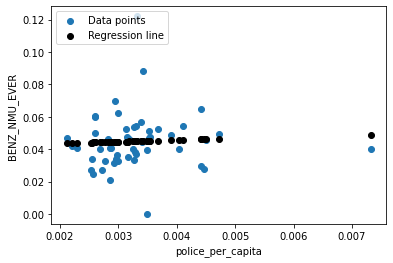

In [130]:
# regression plot for reg 2
reg2_predict = reg2.predict(X1)
print("Regression line: using police_per_capita to predict BENZ_NMU_EVER")
plt.scatter(final_data["police_per_capita"],final_data["BENZ_NMU_EVER"],label="Data points")
plt.scatter(final_data["police_per_capita"],reg2_predict,color="k",label="Regression line")
plt.ylabel("BENZ_NMU_EVER")
plt.xlabel("police_per_capita")
plt.legend(loc = "upper left")
plt.show()

In [131]:
# outliers detection for reg2
studentized_res2 = OLSInfluence(reg2).get_resid_studentized_external() #gets calculate studentized residuals
outliers2 = []
for index,value in studentized_res2.items():
    if value > 3 or value < -3: #checks within 3 st dev
        outliers2.append(index)
outliers2df = final_data[final_data.index.isin(outliers2)] #gets the actual data points who are outliers in reg1 
outliers2df

,DEM_STATE,OP_NMU_EVER,BENZ_NMU_EVER,STIM_NMU_EVER,GABA_NMU_EVER,ILL_USE,police_per_capita,drug_abuse_arrests_PerCapita
0,AK,0.195122,0.121951,0.04878,0.04878,0.585366,0.003328,0.001725


In [132]:
# Y = STIM_NMU_EVER	
reg3 = sm.OLS(final_data["STIM_NMU_EVER"],X1).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:          STIM_NMU_EVER   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.3416
Date:                Thu, 20 Jan 2022   Prob (F-statistic):              0.562
Time:                        09:08:58   Log-Likelihood:                 152.28
No. Observations:                  51   AIC:                            -300.6
Df Residuals:                      49   BIC:                            -296.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
police_per_capita     1.2342      2.11

Regression line: using police_per_capita to predict STIM_NMU_EVER


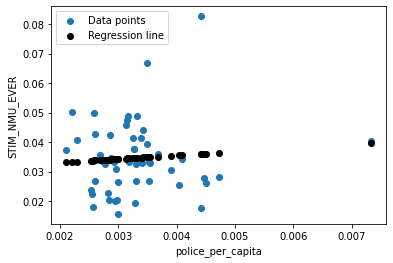

In [133]:
# regression plot for reg3
reg3_predict = reg3.predict(X1)
print("Regression line: using police_per_capita to predict STIM_NMU_EVER")
plt.scatter(final_data["police_per_capita"],final_data["STIM_NMU_EVER"],label="Data points")
plt.scatter(final_data["police_per_capita"],reg3_predict,color="k",label="Regression line")
plt.ylabel("STIM_NMU_EVER")
plt.xlabel("police_per_capita")
plt.legend(loc = "upper left")
plt.show()

In [134]:
# outliers detection for reg3
studentized_res3 = OLSInfluence(reg3).get_resid_studentized_external() #gets calculate studentized residuals
outliers3 = []
for index,value in studentized_res3.items():
    if value > 3 or value < -3: #checks within 3 st dev
        outliers3.append(index)
outliers3df = final_data[final_data.index.isin(outliers3)] #gets the actual data points who are outliers in reg1 
outliers3df

,DEM_STATE,OP_NMU_EVER,BENZ_NMU_EVER,STIM_NMU_EVER,GABA_NMU_EVER,ILL_USE,police_per_capita,drug_abuse_arrests_PerCapita
18,LA,0.159292,0.064897,0.082596,0.044248,0.40118,0.004417,0.007247


In [135]:
# Y = GABA_NMU_EVER	
reg4 = sm.OLS(final_data["GABA_NMU_EVER"],X1).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:          GABA_NMU_EVER   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.3792
Date:                Thu, 20 Jan 2022   Prob (F-statistic):              0.541
Time:                        09:08:58   Log-Likelihood:                 134.10
No. Observations:                  51   AIC:                            -264.2
Df Residuals:                      49   BIC:                            -260.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
police_per_capita    -1.8573      3.01

Regression line: using police_per_capita to predict GABA_NMU_EVER


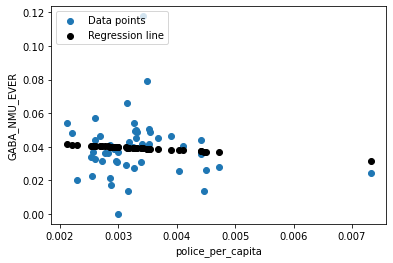

In [136]:
# regression plot for reg4
reg4_predict = reg4.predict(X1)
print("Regression line: using police_per_capita to predict GABA_NMU_EVER")
plt.scatter(final_data["police_per_capita"],final_data["GABA_NMU_EVER"],label="Data points")
plt.scatter(final_data["police_per_capita"],reg4_predict,color="k",label="Regression line")
plt.ylabel("GABA_NMU_EVER")
plt.xlabel("police_per_capita")
plt.legend(loc = "upper left")
plt.show()

In [137]:
# outliers detection for reg4
studentized_res4 = OLSInfluence(reg4).get_resid_studentized_external() #gets calculate studentized residuals
outliers4 = []
for index,value in studentized_res4.items():
    if value > 3 or value < -3: #checks within 3 st dev
        outliers4.append(index)
outliers4df = final_data[final_data.index.isin(outliers4)] #gets the actual data points who are outliers in reg1 
outliers4df

,DEM_STATE,OP_NMU_EVER,BENZ_NMU_EVER,STIM_NMU_EVER,GABA_NMU_EVER,ILL_USE,police_per_capita,drug_abuse_arrests_PerCapita
7,DC,0.279412,0.088235,0.044118,0.117647,0.5,0.003425,0.003842


In [138]:
# Y = ILL_USE (lifetime illicit drug use listed on survey)
reg5 = sm.OLS(final_data["ILL_USE"],X1).fit()
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:                ILL_USE   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.1648
Date:                Thu, 20 Jan 2022   Prob (F-statistic):              0.687
Time:                        09:08:58   Log-Likelihood:                 63.670
No. Observations:                  51   AIC:                            -123.3
Df Residuals:                      49   BIC:                            -119.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
police_per_capita     4.8719     12.00

Regression line: using police_per_capita to predict ILL_USE


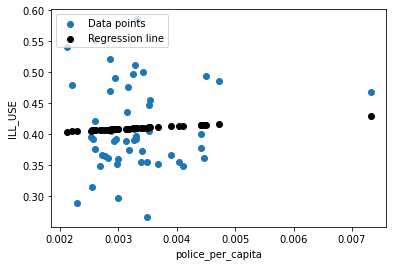

In [139]:
# regression plot for reg5
reg5_predict = reg5.predict(X1)
print("Regression line: using police_per_capita to predict ILL_USE")
plt.scatter(final_data["police_per_capita"],final_data["ILL_USE"],label="Data points")
plt.scatter(final_data["police_per_capita"],reg5_predict,color="k",label="Regression line")
plt.ylabel("ILL_USE")
plt.xlabel("police_per_capita")
plt.legend(loc = "upper left")
plt.show()

In [140]:
# outliers detection for reg5
studentized_res5 = OLSInfluence(reg5).get_resid_studentized_external() #gets calculate studentized residuals
outliers5 = []
for index,value in studentized_res5.items():
    if value > 3 or value < -3: #checks within 3 st dev
        outliers5.append(index)
outliers5df = final_data[final_data.index.isin(outliers5)] #gets the actual data points who are outliers in reg1 
outliers5df

,DEM_STATE,OP_NMU_EVER,BENZ_NMU_EVER,STIM_NMU_EVER,GABA_NMU_EVER,ILL_USE,police_per_capita,drug_abuse_arrests_PerCapita


**Simple Linear Regression:** X = drug_abuse_arrests_PerCapita, Y = different drug uses

In [141]:
X2 = final_data["drug_abuse_arrests_PerCapita"].copy()
X2 = sm.add_constant(X2, prepend=False)

                            OLS Regression Results                            
Dep. Variable:            OP_NMU_EVER   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8105
Date:                Thu, 20 Jan 2022   Prob (F-statistic):              0.372
Time:                        09:08:59   Log-Likelihood:                 100.79
No. Observations:                  51   AIC:                            -197.6
Df Residuals:                      49   BIC:                            -193.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
drug_abuse_arres

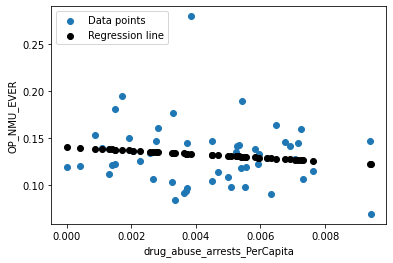

,DEM_STATE,OP_NMU_EVER,BENZ_NMU_EVER,STIM_NMU_EVER,GABA_NMU_EVER,ILL_USE,police_per_capita,drug_abuse_arrests_PerCapita
7,DC,0.279412,0.088235,0.044118,0.117647,0.5,0.003425,0.003842


In [142]:
#Y = OP_NMU_EVER
reg1 = sm.OLS(final_data["OP_NMU_EVER"],X2).fit()
print(reg1.summary())

# regression plot
reg1_predict = reg1.predict(X2)
print("Regression line: using drug_abuse_arrests_PerCapita to predict OP_NMU_EVER")
plt.scatter(final_data["drug_abuse_arrests_PerCapita"],final_data["OP_NMU_EVER"],label="Data points")
plt.scatter(final_data["drug_abuse_arrests_PerCapita"],reg1_predict,color="k",label="Regression line")
plt.ylabel("OP_NMU_EVER")
plt.xlabel("drug_abuse_arrests_PerCapita")
plt.legend(loc = "upper left")
plt.show()

# outliers detection
studentized_res1 = OLSInfluence(reg1).get_resid_studentized_external() #gets calculate studentized residuals
outliers1 = []
for index,value in studentized_res1.items():
    if value > 3 or value < -3: #checks within 3 st dev
        outliers1.append(index)
outliers1df = final_data[final_data.index.isin(outliers1)] #gets the actual data points who are outliers in reg1 
outliers1df

                            OLS Regression Results                            
Dep. Variable:          BENZ_NMU_EVER   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6654
Date:                Thu, 20 Jan 2022   Prob (F-statistic):              0.419
Time:                        09:08:59   Log-Likelihood:                 134.16
No. Observations:                  51   AIC:                            -264.3
Df Residuals:                      49   BIC:                            -260.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
drug_abuse_arres

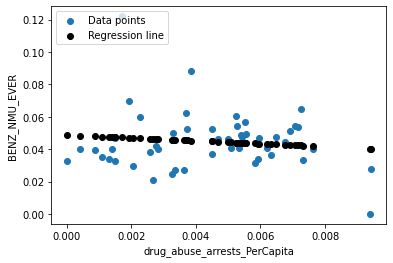

,DEM_STATE,OP_NMU_EVER,BENZ_NMU_EVER,STIM_NMU_EVER,GABA_NMU_EVER,ILL_USE,police_per_capita,drug_abuse_arrests_PerCapita
0,AK,0.195122,0.121951,0.04878,0.04878,0.585366,0.003328,0.001725


In [143]:
#Y = BENZ_NMU_EVER
reg2 = sm.OLS(final_data["BENZ_NMU_EVER"],X2).fit()
print(reg2.summary())

# regression plot
reg2_predict = reg2.predict(X2)
print("Regression line: using drug_abuse_arrests_PerCapita to predict BENZ_NMU_EVER")
plt.scatter(final_data["drug_abuse_arrests_PerCapita"],final_data["BENZ_NMU_EVER"],label="Data points")
plt.scatter(final_data["drug_abuse_arrests_PerCapita"],reg2_predict,color="k",label="Regression line")
plt.ylabel("BENZ_NMU_EVER")
plt.xlabel("drug_abuse_arrests_PerCapita")
plt.legend(loc = "upper left")
plt.show()

# outliers detection
studentized_res2 = OLSInfluence(reg2).get_resid_studentized_external() #gets calculate studentized residuals
outliers2 = []
for index,value in studentized_res2.items():
    if value > 3 or value < -3: #checks within 3 st dev
        outliers2.append(index)
outliers2df = final_data[final_data.index.isin(outliers2)] #gets the actual data points who are outliers in reg1 
outliers2df

                            OLS Regression Results                            
Dep. Variable:          STIM_NMU_EVER   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.267
Date:                Thu, 20 Jan 2022   Prob (F-statistic):              0.266
Time:                        09:08:59   Log-Likelihood:                 152.76
No. Observations:                  51   AIC:                            -301.5
Df Residuals:                      49   BIC:                            -297.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
drug_abuse_arres

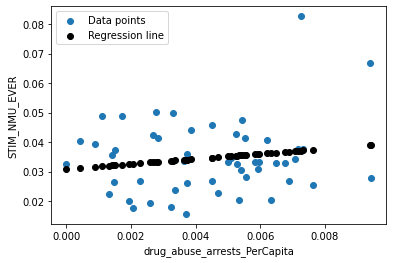

,DEM_STATE,OP_NMU_EVER,BENZ_NMU_EVER,STIM_NMU_EVER,GABA_NMU_EVER,ILL_USE,police_per_capita,drug_abuse_arrests_PerCapita
18,LA,0.159292,0.064897,0.082596,0.044248,0.40118,0.004417,0.007247


In [144]:
#Y =	STIM_NMU_EVER
reg3 = sm.OLS(final_data["STIM_NMU_EVER"],X2).fit()
print(reg3.summary())

# regression plot
reg3_predict = reg3.predict(X2)
print("Regression line: using drug_abuse_arrests_PerCapita to predict STIM_NMU_EVER")
plt.scatter(final_data["drug_abuse_arrests_PerCapita"],final_data["STIM_NMU_EVER"],label="Data points")
plt.scatter(final_data["drug_abuse_arrests_PerCapita"],reg3_predict,color="k",label="Regression line")
plt.ylabel("STIM_NMU_EVER")
plt.xlabel("drug_abuse_arrests_PerCapita")
plt.legend(loc = "upper left")
plt.show()

# outliers detection
studentized_res3 = OLSInfluence(reg3).get_resid_studentized_external() #gets calculate studentized residuals
outliers3 = []
for index,value in studentized_res3.items():
    if value > 3 or value < -3: #checks within 3 st dev
        outliers3.append(index)
outliers3df = final_data[final_data.index.isin(outliers3)] #gets the actual data points who are outliers in reg1 
outliers3df

                            OLS Regression Results                            
Dep. Variable:          GABA_NMU_EVER   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.1951
Date:                Thu, 20 Jan 2022   Prob (F-statistic):              0.661
Time:                        09:08:59   Log-Likelihood:                 134.01
No. Observations:                  51   AIC:                            -264.0
Df Residuals:                      49   BIC:                            -260.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
drug_abuse_arres

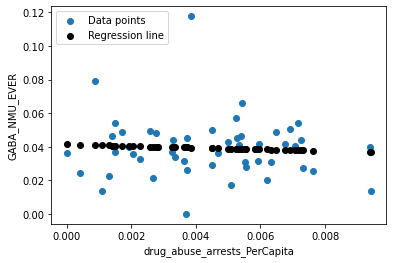

,DEM_STATE,OP_NMU_EVER,BENZ_NMU_EVER,STIM_NMU_EVER,GABA_NMU_EVER,ILL_USE,police_per_capita,drug_abuse_arrests_PerCapita
7,DC,0.279412,0.088235,0.044118,0.117647,0.5,0.003425,0.003842


In [145]:
#Y =	GABA_NMU_EVER
reg4 = sm.OLS(final_data["GABA_NMU_EVER"],X2).fit()
print(reg4.summary())

# regression plot
reg4_predict = reg4.predict(X2)
print("Regression line: using drug_abuse_arrests_PerCapita to predict GABA_NMU_EVER")
plt.scatter(final_data["drug_abuse_arrests_PerCapita"],final_data["GABA_NMU_EVER"],label="Data points")
plt.scatter(final_data["drug_abuse_arrests_PerCapita"],reg4_predict,color="k",label="Regression line")
plt.ylabel("GABA_NMU_EVER")
plt.xlabel("drug_abuse_arrests_PerCapita")
plt.legend(loc = "upper left")
plt.show()

# outliers detection
studentized_res4 = OLSInfluence(reg4).get_resid_studentized_external() #gets calculate studentized residuals
outliers4 = []
for index,value in studentized_res4.items():
    if value > 3 or value < -3: #checks within 3 st dev
        outliers4.append(index)
outliers4df = final_data[final_data.index.isin(outliers4)] #gets the actual data points who are outliers in reg1 
outliers4df

                            OLS Regression Results                            
Dep. Variable:                ILL_USE   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     7.079
Date:                Thu, 20 Jan 2022   Prob (F-statistic):             0.0105
Time:                        09:09:00   Log-Likelihood:                 67.025
No. Observations:                  51   AIC:                            -130.1
Df Residuals:                      49   BIC:                            -126.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
drug_abuse_arres

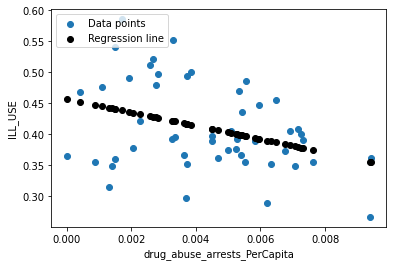

,DEM_STATE,OP_NMU_EVER,BENZ_NMU_EVER,STIM_NMU_EVER,GABA_NMU_EVER,ILL_USE,police_per_capita,drug_abuse_arrests_PerCapita


In [146]:
#Y =	ILL_USE
reg5 = sm.OLS(final_data["ILL_USE"],X2).fit()
print(reg5.summary())

# regression plot
reg5_predict = reg5.predict(X2)
print("Regression line: using drug_abuse_arrests_PerCapita to predict ILL_USE")
plt.scatter(final_data["drug_abuse_arrests_PerCapita"],final_data["ILL_USE"],label="Data points")
plt.scatter(final_data["drug_abuse_arrests_PerCapita"],reg5_predict,color="k",label="Regression line")
plt.ylabel("ILL_USE")
plt.xlabel("drug_abuse_arrests_PerCapita")
plt.legend(loc = "upper left")
plt.show()

# outliers detection
studentized_res5 = OLSInfluence(reg5).get_resid_studentized_external() #gets calculate studentized residuals
outliers5 = []
for index,value in studentized_res5.items():
    if value > 3 or value < -3: #checks within 3 st dev
        outliers5.append(index)
outliers5df = final_data[final_data.index.isin(outliers5)] #gets the actual data points who are outliers in reg1 
outliers5df

**Multiple Regression**: X1 = police_per_capita, X2 = drug_abuse_arrests_PerCapita, Y = different drug uses

LOWESS

In [158]:
# OP_NMU_EVER
endog = final_data["OP_NMU_EVER"].values
endog
exogvals = X1["police_per_capita"]
exog = exogvals.values
# x values 
#X1
#X2
# y values
#final_data["OP_NMU_EVER"]
#final_data["BENZ_NMU_EVER"]
#final_data["STIM_NMU_EVER"]
#final_data["GABA_NMU_EVER"]
#final_data["ILL_USE"]
new_y = lowess(endog, exog, frac=1./3)
new_y2 = lowess(endog, exog, frac=2/3)
new_y3 = lowess(endog, exog, frac=1/5)


fig = px.scatter(df, x=exog, y=endog, 
                 opacity=0.8, color_discrete_sequence=['black'])

fig.update_layout(title=dict(text="Police Per Capita vs OP_NMU_EVER ", 
                             font=dict(color='black')))
# Add the prediction line
fig.add_traces(go.Scatter(x=new_y[:,0], y=new_y[:,1], name='LOWESS, frac=1/3', line=dict(color='red')))
fig.add_traces(go.Scatter(x=new_y2[:,0], y=new_y2[:,1], name='LOWESS, frac=2/3', line=dict(color='yellow')))
#fig.add_traces(go.Scatter(x=new_y3[:,0], y=new_y3[:,1], name='LOWESS, frac=1/5', line=dict(color='blue')))

In [148]:
# OP_NMU_EVER
endog = final_data["OP_NMU_EVER"].values
endog
exogvals = X2["drug_abuse_arrests_PerCapita"]
exog = exogvals.values
# x values 
#X1
#X2
# y values
#final_data["OP_NMU_EVER"]
#final_data["BENZ_NMU_EVER"]
#final_data["STIM_NMU_EVER"]
#final_data["GABA_NMU_EVER"]
#final_data["ILL_USE"]
new_y = lowess(endog, exog, frac=1./3)
new_y2 = lowess(endog, exog, frac=2/3)
new_y3 = lowess(endog, exog, frac=1/5)


fig = px.scatter(df, x=exog, y=endog, 
                 opacity=0.8, color_discrete_sequence=['black'])

fig.update_layout(title=dict(text="Drug Abuse Arrests Per Capita vs OP_NMU_EVER ", 
                             font=dict(color='black')))
# Add the prediction line
fig.add_traces(go.Scatter(x=new_y[:,0], y=new_y[:,1], name='LOWESS, frac=1/3', line=dict(color='red')))
fig.add_traces(go.Scatter(x=new_y2[:,0], y=new_y2[:,1], name='LOWESS, frac=2/3', line=dict(color='yellow')))
#fig.add_traces(go.Scatter(x=new_y3[:,0], y=new_y3[:,1], name='LOWESS, frac=1/5', line=dict(color='blue')))

In [149]:
endog = final_data["BENZ_NMU_EVER"].values
endog
exogvals = X1["police_per_capita"]
exog = exogvals.values
# x values 
#X1
#X2
# y values
#final_data["OP_NMU_EVER"]
#final_data["BENZ_NMU_EVER"]
#final_data["STIM_NMU_EVER"]
#final_data["GABA_NMU_EVER"]
#final_data["ILL_USE"]
new_y = lowess(endog, exog, frac=1./3)
new_y2 = lowess(endog, exog, frac=2/3)
new_y3 = lowess(endog, exog, frac=1/5)


fig = px.scatter(df, x=exog, y=endog, 
                 opacity=0.8, color_discrete_sequence=['black'])

fig.update_layout(title=dict(text="Police Per Capita vs BENZ_NMU_EVER ", 
                             font=dict(color='black')))
# Add the prediction line
fig.add_traces(go.Scatter(x=new_y[:,0], y=new_y[:,1], name='LOWESS, frac=1/3', line=dict(color='red')))
fig.add_traces(go.Scatter(x=new_y2[:,0], y=new_y2[:,1], name='LOWESS, frac=2/3', line=dict(color='yellow')))
#fig.add_traces(go.Scatter(x=new_y3[:,0], y=new_y3[:,1], name='LOWESS, frac=1/5', line=dict(color='blue')))

In [150]:
# BENZ_NMU_EVER
endog = final_data["BENZ_NMU_EVER"].values
endog
exogvals = X2["drug_abuse_arrests_PerCapita"]
exog = exogvals.values
# x values 
#X1
#X2
# y values
#final_data["OP_NMU_EVER"]
#final_data["BENZ_NMU_EVER"]
#final_data["STIM_NMU_EVER"]
#final_data["GABA_NMU_EVER"]
#final_data["ILL_USE"]
new_y = lowess(endog, exog, frac=1./3)
new_y2 = lowess(endog, exog, frac=2/3)
new_y3 = lowess(endog, exog, frac=1/5)


fig = px.scatter(df, x=exog, y=endog, 
                 opacity=0.8, color_discrete_sequence=['black'])

fig.update_layout(title=dict(text="Drug Abuse Arrests Per Capita vs BENZ_NMU_EVER ", 
                             font=dict(color='black')))
# Add the prediction line
fig.add_traces(go.Scatter(x=new_y[:,0], y=new_y[:,1], name='LOWESS, frac=1/3', line=dict(color='red')))
fig.add_traces(go.Scatter(x=new_y2[:,0], y=new_y2[:,1], name='LOWESS, frac=2/3', line=dict(color='yellow')))
#fig.add_traces(go.Scatter(x=new_y3[:,0], y=new_y3[:,1], name='LOWESS, frac=1/5', line=dict(color='blue')))

In [151]:
endog = final_data["STIM_NMU_EVER"].values
endog
exogvals = X1["police_per_capita"]
exog = exogvals.values
# x values 
#X1
#X2
# y values
#final_data["OP_NMU_EVER"]
#final_data["BENZ_NMU_EVER"]
#final_data["STIM_NMU_EVER"]
#final_data["GABA_NMU_EVER"]
#final_data["ILL_USE"]
new_y = lowess(endog, exog, frac=1./3)
new_y2 = lowess(endog, exog, frac=2/3)
new_y3 = lowess(endog, exog, frac=1/5)


fig = px.scatter(df, x=exog, y=endog, 
                 opacity=0.8, color_discrete_sequence=['black'])

fig.update_layout(title=dict(text="Police Per Capita vs STIM_NMU_EVER ", 
                             font=dict(color='black')))
# Add the prediction line
fig.add_traces(go.Scatter(x=new_y[:,0], y=new_y[:,1], name='LOWESS, frac=1/3', line=dict(color='red')))
fig.add_traces(go.Scatter(x=new_y2[:,0], y=new_y2[:,1], name='LOWESS, frac=2/3', line=dict(color='yellow')))
#fig.add_traces(go.Scatter(x=new_y3[:,0], y=new_y3[:,1], name='LOWESS, frac=1/5', line=dict(color='blue')))

In [152]:
# STIM_NMU_EVER
endog = final_data["STIM_NMU_EVER"].values
endog
exogvals = X2["drug_abuse_arrests_PerCapita"]
exog = exogvals.values
# x values 
#X1
#X2
# y values
#final_data["OP_NMU_EVER"]
#final_data["BENZ_NMU_EVER"]
#final_data["STIM_NMU_EVER"]
#final_data["GABA_NMU_EVER"]
#final_data["ILL_USE"]
new_y = lowess(endog, exog, frac=1./3)
new_y2 = lowess(endog, exog, frac=2/3)
new_y3 = lowess(endog, exog, frac=1/5)


fig = px.scatter(df, x=exog, y=endog, 
                 opacity=0.8, color_discrete_sequence=['black'])

fig.update_layout(title=dict(text="Drug Abuse Arrests Per Capita vs STIM_NMU_EVER ", 
                             font=dict(color='black')))
# Add the prediction line
fig.add_traces(go.Scatter(x=new_y[:,0], y=new_y[:,1], name='LOWESS, frac=1/3', line=dict(color='red')))
fig.add_traces(go.Scatter(x=new_y2[:,0], y=new_y2[:,1], name='LOWESS, frac=2/3', line=dict(color='yellow')))
#fig.add_traces(go.Scatter(x=new_y3[:,0], y=new_y3[:,1], name='LOWESS, frac=1/5', line=dict(color='blue')))

In [153]:
endog = final_data["GABA_NMU_EVER"].values
endog
exogvals = X1["police_per_capita"]
exog = exogvals.values
# x values 
#X1
#X2
# y values
#final_data["OP_NMU_EVER"]
#final_data["BENZ_NMU_EVER"]
#final_data["STIM_NMU_EVER"]
#final_data["GABA_NMU_EVER"]
#final_data["ILL_USE"]
new_y = lowess(endog, exog, frac=1./3)
new_y2 = lowess(endog, exog, frac=2/3)
new_y3 = lowess(endog, exog, frac=1/5)


fig = px.scatter(df, x=exog, y=endog, 
                 opacity=0.8, color_discrete_sequence=['black'])

fig.update_layout(title=dict(text="Police Per Capita vs GABA_NMU_EVER ", 
                             font=dict(color='black')))
# Add the prediction line
fig.add_traces(go.Scatter(x=new_y[:,0], y=new_y[:,1], name='LOWESS, frac=1/3', line=dict(color='red')))
fig.add_traces(go.Scatter(x=new_y2[:,0], y=new_y2[:,1], name='LOWESS, frac=2/3', line=dict(color='yellow')))
#fig.add_traces(go.Scatter(x=new_y3[:,0], y=new_y3[:,1], name='LOWESS, frac=1/5', line=dict(color='blue')))

In [154]:
# GABA_NMU_EVER
endog = final_data["GABA_NMU_EVER"].values
endog
exogvals = X2["drug_abuse_arrests_PerCapita"]
exog = exogvals.values
# x values 
#X1
#X2
# y values
#final_data["OP_NMU_EVER"]
#final_data["BENZ_NMU_EVER"]
#final_data["STIM_NMU_EVER"]
#final_data["GABA_NMU_EVER"]
#final_data["ILL_USE"]
new_y = lowess(endog, exog, frac=1./3)
new_y2 = lowess(endog, exog, frac=2/3)
new_y3 = lowess(endog, exog, frac=1/5)


fig = px.scatter(df, x=exog, y=endog, 
                 opacity=0.8, color_discrete_sequence=['black'])

fig.update_layout(title=dict(text="Drug Abuse Arrests Per Capita vs GABA_NMU_EVER ", 
                             font=dict(color='black')))
# Add the prediction line
fig.add_traces(go.Scatter(x=new_y[:,0], y=new_y[:,1], name='LOWESS, frac=1/3', line=dict(color='red')))
fig.add_traces(go.Scatter(x=new_y2[:,0], y=new_y2[:,1], name='LOWESS, frac=2/3', line=dict(color='yellow')))
#fig.add_traces(go.Scatter(x=new_y3[:,0], y=new_y3[:,1], name='LOWESS, frac=1/5', line=dict(color='blue')))

In [155]:
endog = final_data["ILL_USE"].values
endog
exogvals = X1["police_per_capita"]
exog = exogvals.values
# x values 
#X1
#X2
# y values
#final_data["OP_NMU_EVER"]
#final_data["BENZ_NMU_EVER"]
#final_data["STIM_NMU_EVER"]
#final_data["GABA_NMU_EVER"]
#final_data["ILL_USE"]
new_y = lowess(endog, exog, frac=1./3)
new_y2 = lowess(endog, exog, frac=2/3)
new_y3 = lowess(endog, exog, frac=1/5)


fig = px.scatter(df, x=exog, y=endog, 
                 opacity=0.8, color_discrete_sequence=['black'])

fig.update_layout(title=dict(text="Police Per Capita vs ILL_USE ", 
                             font=dict(color='black')))
# Add the prediction line
fig.add_traces(go.Scatter(x=new_y[:,0], y=new_y[:,1], name='LOWESS, frac=1/3', line=dict(color='red')))
fig.add_traces(go.Scatter(x=new_y2[:,0], y=new_y2[:,1], name='LOWESS, frac=2/3', line=dict(color='yellow')))
#fig.add_traces(go.Scatter(x=new_y3[:,0], y=new_y3[:,1], name='LOWESS, frac=1/5', line=dict(color='blue')))

In [156]:
# ILL_USE
endog = final_data["ILL_USE"].values
endog
exogvals = X2["drug_abuse_arrests_PerCapita"]
exog = exogvals.values
new_y = lowess(endog, exog, frac=1./3)
new_y2 = lowess(endog, exog, frac=2/3)
new_y3 = lowess(endog, exog, frac=1/5)


fig = px.scatter(df, x=exog, y=endog, 
                 opacity=0.8, color_discrete_sequence=['black'])

fig.update_layout(title=dict(text="Drug Abuse Arrests Per Capita vs ILL_USE ", 
                             font=dict(color='black')))
# Add the prediction line
fig.add_traces(go.Scatter(x=new_y[:,0], y=new_y[:,1], name='LOWESS, frac=1/3', line=dict(color='red')))
fig.add_traces(go.Scatter(x=new_y2[:,0], y=new_y2[:,1], name='LOWESS, frac=2/3', line=dict(color='yellow')))
#fig.add_traces(go.Scatter(x=new_y3[:,0], y=new_y3[:,1], name='LOWESS, frac=1/5', line=dict(color='blue')))